In [20]:
import pandas as pd

house_df = pd.read_csv(r'C:/Users/user/Desktop/github/scikit-learn/california-house-prices/train.csv')
geocoded_df = pd.read_csv(r'C:/Users/user/Desktop/github/geocoded_cities.csv')
# 확인
print(house_df.shape)
print(geocoded_df.shape)

(47439, 41)
(828, 3)


In [21]:
# 현재 정의된 DataFrame 확인
import pandas as pd
dfs = [var for var in dir() if isinstance(eval(var), pd.DataFrame)]
print("사용 가능한 DataFrame:", dfs)

사용 가능한 DataFrame: ['geocoded_df', 'house_df']


In [22]:
import pandas as pd
import folium

# 1. 데이터 병합
df_main = pd.merge(house_df, geocoded_df, 
                   left_on='City', right_on='city', 
                   how='left')

print(f"✅ 병합 완료: {len(df_main):,}건")
print(f"📍 좌표 매칭률: {df_main['lat'].notna().sum() / len(df_main) * 100:.1f}%")

# 2. 지도 생성
m = folium.Map(location=[36.7, -119.7], zoom_start=6)

# 도시별 평균 가격 계산
city_avg = df_main.groupby(['City','lat','lon'])['Sold Price'].mean().reset_index()
city_avg.columns = ['City', 'lat', 'lon', 'avg_price']
city_avg = city_avg.dropna()

# 지도에 마커 추가
for idx, row in city_avg.iterrows():
    folium.CircleMarker(
        [row['lat'], row['lon']],
        radius=min(row['avg_price']/100000, 15),  # 가격에 비례한 크기
        color='red' if row['avg_price'] > 500000 else 'blue',
        fill=True,
        fill_opacity=0.6,
        popup=f"<b>{row['City']}</b><br>${row['avg_price']:,.0f}"
    ).add_to(m)

m.save('california_house_prices.html')
print(f"🗺️ 지도 저장 완료! 총 {len(city_avg):,}개의 마커")

✅ 병합 완료: 47,439건
📍 좌표 매칭률: 29.1%
🗺️ 지도 저장 완료! 총 828개의 마커


In [23]:
import os
print(os.listdir('.'))

['20260129 권태은.ipynb', 'california-house-prices', 'california-house-prices.zip', 'california_house_prices.html', 'scikit-learn', 'Untitled-1.ipynb']


In [24]:
## ----------------------------------------------------------------------------------

# 기본 통계
print(df_main['Sold Price'].describe())
print(f"\n총 도시 수: {df_main['City'].nunique()}")
print(f"좌표 매칭률: {df_main['lat'].notna().sum() / len(df_main) * 100:.1f}%")

# Top 10 비싼/저렴한 도시
city_prices = df_main.groupby('City')['Sold Price'].agg(['mean', 'count'])
print("\n가장 비싼 도시 Top 10:")
print(city_prices[city_prices['count'] >= 10].nlargest(10, 'mean'))
print("\n가장 저렴한 도시 Top 10:")
print(city_prices[city_prices['count'] >= 10].nsmallest(10, 'mean'))

In [25]:
import folium
from folium.plugins import HeatMap

# 캘리포니아 중심 지도
m = folium.Map(location=[36.7, -119.7], zoom_start=6)

# 도시별 평균 가격
city_avg = df_main.groupby(['City','lat','lon']).agg({
    'Sold Price': ['mean', 'count']
}).reset_index()
city_avg.columns = ['City', 'lat', 'lon', 'avg_price', 'count']
city_avg = city_avg.dropna()

# 마커 추가
for _, row in city_avg.iterrows():
    if row['count'] >= 5:  # 5건 이상만
        folium.CircleMarker(
            [row['lat'], row['lon']],
            radius=min(row['avg_price']/100000, 15),  # 가격에 비례
            color='red' if row['avg_price'] > 800000 else 'blue',
            fill=True,
            popup=f"{row['City']}<br>${row['avg_price']:,.0f}<br>{int(row['count'])}건"
        ).add_to(m)

m.save('price_map.html')
print("지도 저장 완료! price_map.html 열어보세요")

지도 저장 완료! price_map.html 열어보세요


C:\Users\user\AppData\Local\Temp\ipykernel_13960\2874292630.py:13: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13960\2874292630.py:13: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13960\2874292630.py:13: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13960\2874292630.py:13: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13960\2874292630.py:13: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\user\miniconda3\envs\sa\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) 

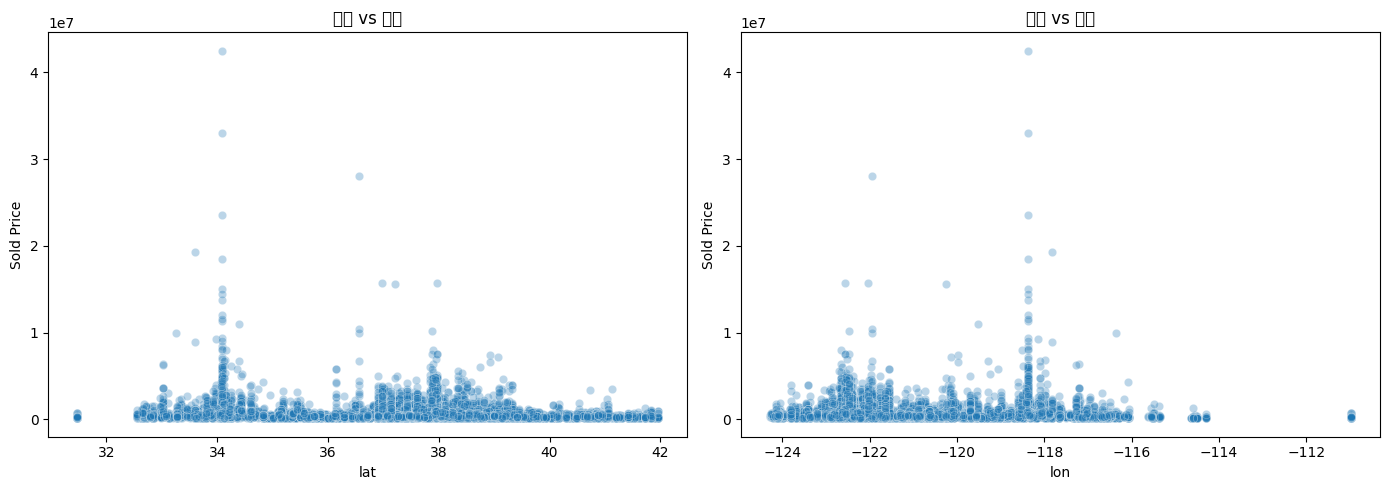

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# 위도/경도별 가격 분포
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(data=df_main, x='lat', y='Sold Price', alpha=0.3, ax=axes[0])
axes[0].set_title('위도 vs 가격')

sns.scatterplot(data=df_main, x='lon', y='Sold Price', alpha=0.3, ax=axes[1])
axes[1].set_title('경도 vs 가격')

plt.tight_layout()
plt.show()

In [27]:
# 경도로 해안 근접성 판단 (경도 -122 이하면 해안 근처)
df_main['coastal'] = df_main['lon'] < -122

print(df_main.groupby('coastal')['Sold Price'].describe())

           count          mean           std       min       25%       50%  \
coastal                                                                      
False    43424.0  1.333638e+06  1.746751e+06  100500.0  588000.0  990000.0   
True      4015.0  8.895255e+05  8.627911e+05  102000.0  372250.0  676000.0   

               75%         max  
coastal                         
False    1558065.0  90000000.0  
True     1100000.0  15750000.0  


In [28]:
# SF(37.77, -122.41), LA(34.05, -118.24) 거리 계산
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # 지구 반경 (km)
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat/2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

df_main['dist_to_SF'] = haversine_distance(df_main['lat'], df_main['lon'], 37.77, -122.41)
df_main['dist_to_LA'] = haversine_distance(df_main['lat'], df_main['lon'], 34.05, -118.24)

# 상관관계
print(df_main[['dist_to_SF', 'dist_to_LA', 'Sold Price']].corr())

            dist_to_SF  dist_to_LA  Sold Price
dist_to_SF    1.000000   -0.458123   -0.085308
dist_to_LA   -0.458123    1.000000   -0.116400
Sold Price   -0.085308   -0.116400    1.000000


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Feature 준비
features = ['lat', 'lon', 'Bedrooms', 'Bathrooms', 
            'Total interior livable area', 'Year built']

# 데이터 복사 및 전처리
df_clean = df_main[features + ['Sold Price']].copy()

# Bedrooms를 숫자로 변환 (숫자가 아닌 값은 NaN으로)
df_clean['Bedrooms'] = pd.to_numeric(df_clean['Bedrooms'], errors='coerce')

# NaN 제거
df_clean = df_clean.dropna()

# X, y 분리
X = df_clean[features]
y = df_clean['Sold Price']

print(f"사용 가능한 데이터: {len(X)}건")

# 학습
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

print(f"R² Score: {model.score(X_test, y_test):.3f}")

# Feature Importance
importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n📊 Feature Importance:")
print(importance.to_string(index=False))
# Bedrooms 컬럼의 이상한 값들 확인
print("Bedrooms 컬럼의 unique 값 샘플:")
print(df_main['Bedrooms'].value_counts().head(20))

사용 가능한 데이터: 10891건
R² Score: 0.117

📊 Feature Importance:
                    feature  importance
Total interior livable area    0.524499
                  Bathrooms    0.124889
                        lon    0.117777
                        lat    0.113166
                 Year built    0.081062
                   Bedrooms    0.038606
Bedrooms 컬럼의 unique 값 샘플:
Bedrooms
3                                                                                              14943
2                                                                                               9772
4                                                                                               7073
1                                                                                               2313
5                                                                                               2016
Walk-in Closet                                                                                  1097
Master Suite / Retrea